Import all modules required for this notebook

In [1]:
from scipy.stats import binom, beta
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from scipy import stats

# The below suppresses all warnings in the notebook
# Only leave this uncommented for display purposes
import warnings
warnings.filterwarnings("ignore")

Now generate a binomial distribution corresponding to flipping a coin.

Number of possible heads in 10 trials: 
[ 0  1  2  3  4  5  6  7  8  9 10]

Probability of generating the number of heads from 0 to 10: 
[1.00000000e-10 9.00000000e-09 3.64500000e-07 8.74800000e-06
 1.37781000e-04 1.48803480e-03 1.11602610e-02 5.73956280e-02
 1.93710244e-01 3.87420489e-01 3.48678440e-01]


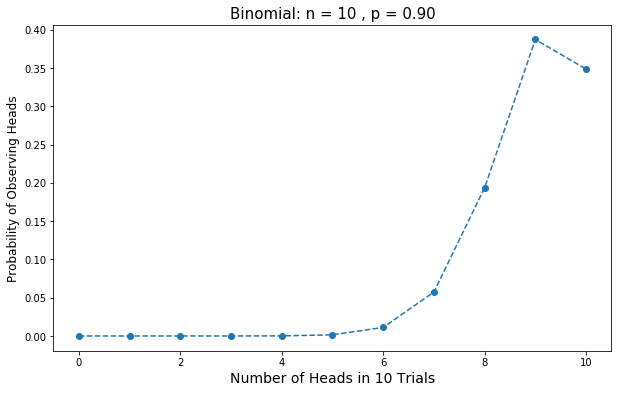

In [2]:
n = 10    # No. of coin flips
p = 0.9   # Probability of observing head

# Possible no. of heads observed after the flip; Example: k = 0 if head was not observed in n trials
k = np.arange(0, n+1)  

# Generate the binomial distribution pmf using scipy.stats
binomial = binom.pmf(k, n, p)

print("Number of possible heads in %d trials: " % n)
print(k)

print("\nProbability of generating the number of heads from 0 to %d: " % n)
print(binomial)


plt.figure(figsize=(10, 6))
plt.plot(k, binomial, 'o--')
plt.title('Binomial: n = %i , p = %.2f' % (n, p), fontsize = 15)
plt.xlabel('Number of Heads in %i Trials' % n, fontsize = 14)
plt.ylabel('Probability of Observing Heads', fontsize = 12)
plt.show()

We will now generate a Beta Distribution using scipy.stats for a "fair" coin.

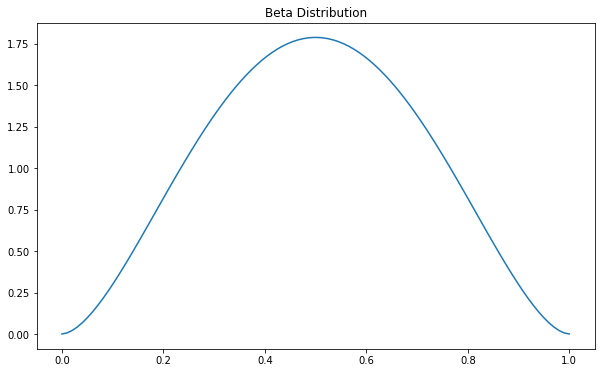

In [3]:
# Parameters for Beta distribution
a = 2.75     # Shape
b = 2.75     # Rate

# Generate 100 points between 0 and 1
x = np.linspace(0, 1.0, 100)

# Compute the density of these points using the Beta distribution's pdf function from scipy.stats
y = beta.pdf(x, a, b)

plt.figure(figsize=(10, 6))
plt.plot(x,y)
plt.title("Beta Distribution")
plt.show()

Below we generate multiple beta distributions, for different types of distributions.<br>
This allows us to incorporate skewed distributions into our prior.

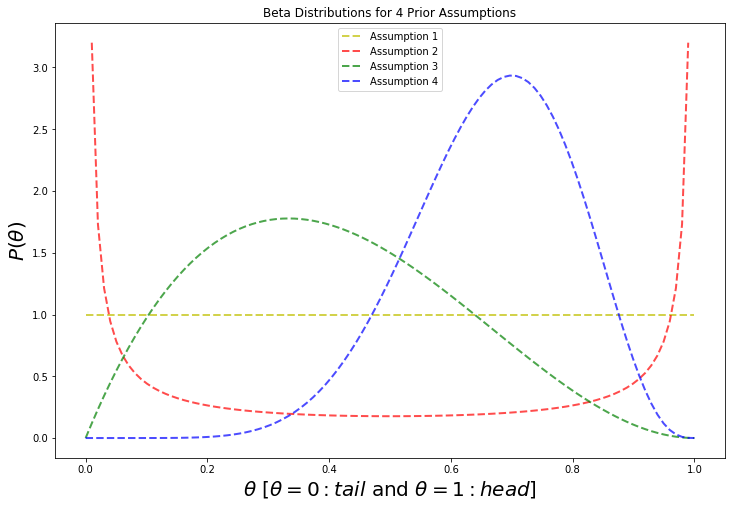

In [4]:
# Generate 100 points between 0 and 1
x = np.linspace(0, 1.0, 100)

# Compute the density of these points using the various Beta distributions
y1 = beta.pdf(x, 1.0, 1.0)  # Uniform Distribution  a = 1 & b = 1
y2 = beta.pdf(x, 0.1, 0.1)  # Bimodal Distribution  a < 1 & b < 1
y3 = beta.pdf(x, 2.0, 3.0)  # Unimodal Distribution a > 1 & b > 1
y4 = beta.pdf(x, 8.0, 4.0)  # Unimodal Distribution a > 1 & b > 1

plt.figure(figsize=(12, 8))

plt.plot(x, y1, "y--", lw=2, alpha=0.7, label='Assumption 1')
plt.plot(x, y2, "r--", lw=2, alpha=0.7, label='Assumption 2')
plt.plot(x, y3, "g--", lw=2, alpha=0.7, label='Assumption 3')
plt.plot(x, y4, "b--", lw=2, alpha=0.7, label='Assumption 4')
plt.legend(loc='best',frameon=True)
plt.xlabel(r"$\theta$ [$\theta = 0: tail$ and $\theta = 1: head$]", fontsize=20)
plt.ylabel(r"$P(\theta)$", fontsize=20)
plt.title("Beta Distributions for 4 Prior Assumptions")
plt.show()

You can see how some distributions are now skewed more towards heads or tails.

Now use a Beta distribution as a prior distribution assumption (by providing the chosen a and b parameters).<br>
Also provide the required number of trials to simulate and the number of heads to have assumed came up during those trials.<br>
The below code will output the estimated mode using frequentist statistics and the estimated mode using bayesian statistics.<br>
It will also plot the provided prior distribution and the posterior distribution as calculated using bayesian learning.


--------------- Frequentist Learning: ---------------

Theta (MLE): 0.850000

--------------- Bayesian Learning: ---------------

Theta (MAP): 0.836364

Theta (posterior) Mean: 0.830357

Bayesian Analysis: Error Bar or Standard Deviation

Theta (posterior) Standard Deviation: 0.035707


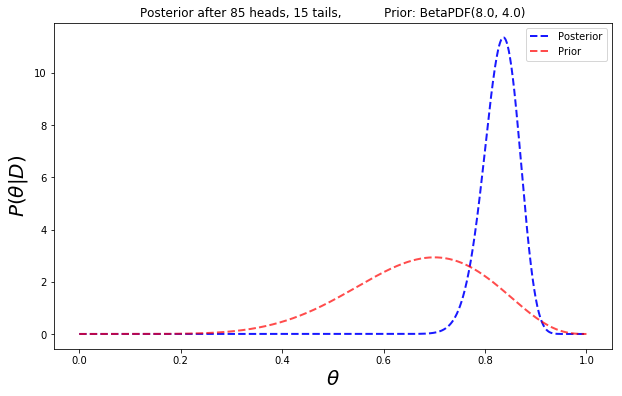

In [5]:
# The prior is modeled via Beta distribution
# The posterior is generated by updating the Prior parameters

noOfTrials = 100
noOfHeads = 85

# Parameters for the Beta distribution
a = 8     # shape parameter
b = 4     # rate parameter

noOfTails = noOfTrials - noOfHeads

print("\n--------------- Frequentist Learning: ---------------")
# Frequentist Analysis
theta_mle = noOfHeads/noOfTrials
print("\nTheta (MLE): %f" % theta_mle)

print("\n--------------- Bayesian Learning: ---------------")
# Bayesian Analysis
# Maximum A Posteriori (MAP) Estimate of Theta
theta_map = (noOfHeads + a - 1)/(noOfHeads + noOfTails + a + b - 2)
print("\nTheta (MAP): %f" % theta_map)

# Posterior Mean of Theta
theta_posterior_mean = (noOfHeads + a)/(noOfHeads + noOfTails + a + b)
print("\nTheta (posterior) Mean: %f" % theta_posterior_mean)

print("\nBayesian Analysis: Error Bar or Standard Deviation")

# Posterior Standard Deviation (or the error bar) of Theta
posterior_std = np.sqrt((theta_mle*(1 - theta_mle))/noOfTrials)
print("\nTheta (posterior) Standard Deviation: %f" % posterior_std)

# Plot the posterior and the prior distributions
x = np.linspace(0, 1, 1000)
y1 = stats.beta.pdf(x, noOfHeads + a, noOfTails + b)        # Posterior distribution
y2 = stats.beta.pdf(x, a, b)                                # Prior distribution
fig = plt.figure(figsize=(10, 6))
plt.plot(x, y1, "b--", lw=2, alpha=0.9, label='Posterior')
plt.plot(x, y2, "r--", lw=2, alpha=0.7, label='Prior')

plt.title("Posterior after %d heads, %d tails, \
          Prior: BetaPDF(%.1f, %.1f)" % (noOfHeads, noOfTails, a, b))
plt.legend(loc='best',frameon=True)
plt.xlabel(r"$\theta$", fontsize=20)
plt.ylabel(r"$P(\theta|D)$", fontsize=20)
plt.show()
